<a href="https://colab.research.google.com/github/PattarapornH/cats-dogs-classifier/blob/master/cats_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.utils import np_utils
from google.colab import drive

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls 'gdrive/My Drive/Colab Notebooks/cats_dogs/'

cats_dogs_classifier.ipynb  meaw.PNG	 tintin.jpg	training_set
epoch50.h5		    test_set	 tong.png
epoch50_valid.h5	    tintin2.jpg  training8k.h5


In [0]:
!pip install -U -q PyDrive

In [0]:
# collect training data path
path_train = 'gdrive/My Drive/Colab Notebooks/cats_dogs/training_set/'
path_cats_train = []
path_dogs_train = []
for path in os.listdir(path_train + 'cats'):
  path_cats_train.append(os.path.join(path_train+'cats', path))
for path in os.listdir(path_train + 'dogs'):
  path_dogs_train.append(os.path.join(path_train+'dogs', path))

In [11]:
len(path_cats_train),len(path_dogs_train)

(4000, 4005)

In [12]:
# load training data
X_train = []
j = 0
k = 0
for i in range(7000):
  if(i%50 == 0):
    print('.', end='')
  if(i%4000 == 0 and i != 0):
    print('\n')
# i%2 == 0 ? cat:dog
  try:
    if(i%2 == 0 and j < len(path_cats_train)):
      path = path_cats_train[j]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
      j+=1
    if(i%2 == 1 and k < len(path_dogs_train)):
      path = path_dogs_train[k]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print(i)
    print(j)
    print(k)
    break
print("\nLoad training data complete")

.................................................................................

...........................................................
Load training data complete


In [13]:
nb_train_samples = len(X_train)
nb_train_samples

7000

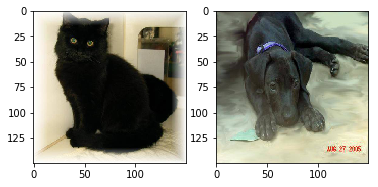

In [14]:
plt.subplot(121)
plt.imshow(X_train[0]/255)
plt.subplot(122)
plt.imshow(X_train[1]/255)

In [15]:
X_train = np.array(X_train)
X_train.shape

(7000, 150, 150, 3)

In [16]:
print(j,k)

3500 3500


In [17]:
# load validation data
X_valid = []
for i in range(1000):
  if(i%10 == 0):
    print('.', end='')
  if(i == 500):
    print('\n')
  try:
    if(i%2 == 0):
      path = path_cats_train[j]
      img = load_img(path, target_size=(150, 150))
      X_valid.append(img_to_array(img))
      j+=1
    if(i%2 == 1):
      path = path_dogs_train[k]
      img = load_img(path, target_size=(150, 150))
      X_valid.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print("j",j)
    print("k",k)
    print(i)
    break
print('\nload valid data complete')

...................................................

.................................................
load valid data complete


(1000, 150, 150, 3)


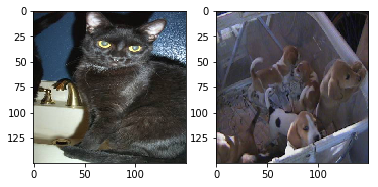

In [18]:
X_valid = np.array(X_valid)
print(X_valid.shape)
plt.subplot(121)
plt.imshow(X_valid[0]/255)
plt.subplot(122)
plt.imshow(X_valid[1]/255)

In [0]:
# collect test data path
path_test = 'gdrive/My Drive/Colab Notebooks/cats_dogs/test_set/'
path_cats_test = []
path_dogs_test = []
for path in os.listdir(path_test + 'cats'):
  path_cats_test.append(os.path.join(path_test+'cats', path))
for path in os.listdir(path_test + 'dogs'):
  path_dogs_test.append(os.path.join(path_test+'dogs', path))

In [20]:
len(path_cats_test),len(path_dogs_test)

(1011, 1012)

In [21]:
# load test data
X_test = []
j = 0
k = 0
for i in range(2000):
  if(i%10 == 0):
    print('.', end='')
  if(i == 1000):
    print('\n')
  try:
    if(i%2 == 0):
      path = path_cats_test[j]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
      j+=1
    elif(i%2 == 1):
      path = path_dogs_test[k]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print(i)
    break
print('\nload test data complete')

.....................................................................................................

...................................................................................................
load test data complete


(2000, 150, 150, 3)


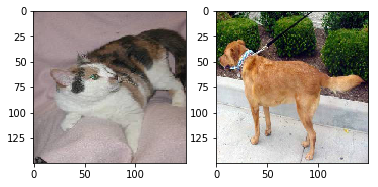

In [22]:
X_test = np.array(X_test)
print(X_test.shape)
plt.subplot(121)
plt.imshow(X_test[0]/255)
plt.subplot(122)
plt.imshow(X_test[1]/255)

In [25]:
# init y --> 0 = cat, 1 = dog
y_train = []
y_test = []
y_valid = []
for i in range(7000):
  if(i < 1000):
    y_train.append(i%2)
    y_test.append(i%2)
    y_valid.append(i%2)
  elif(i < 2000):
    y_train.append(i%2)
    y_test.append(i%2)    
  else :
    y_train.append(i%2)
    
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)
print('Init label data complete')

Init label data complete


In [0]:
# preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32)

test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32)

valid_generator = test_datagen.flow(
    X_valid,
    y_valid,
    batch_size=32)

<Figure size 432x288 with 0 Axes>

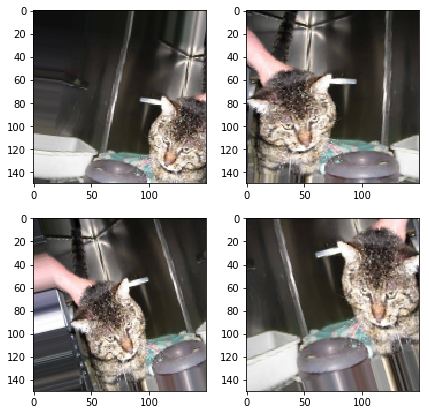

In [28]:
plt.clf()
fnames = [os.path.join(path_train+'cats', fname) for fname in os.listdir(path_train+'cats')]
img_path = fnames[21]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.figure(figsize=(7,7))

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [127]:
# Init CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

# Pooling
model.add(MaxPooling2D((2, 2)))

# Second layer of convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third layer of convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# # Forth layer of convolution
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Dropout
model.add(Dropout(0.5))

# Full Connection
model.add(Dense(512, activation='relu'))

# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 36992)             0         
__________

In [128]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

train_model = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 70,
    validation_data=valid_generator,
    validation_steps=50)

Epoch 1/70
100/100 [==============================] - 16s 162ms/step - loss: 0.7085 - acc: 0.5341 - val_loss: 0.6971 - val_acc: 0.5058
Epoch 2/70
100/100 [==============================] - 15s 145ms/step - loss: 0.6808 - acc: 0.5673 - val_loss: 0.6481 - val_acc: 0.6459
Epoch 3/70
100/100 [==============================] - 16s 158ms/step - loss: 0.6480 - acc: 0.6169 - val_loss: 0.6328 - val_acc: 0.6372
Epoch 4/70
100/100 [==============================] - 15s 149ms/step - loss: 0.6378 - acc: 0.6338 - val_loss: 0.6108 - val_acc: 0.6593
Epoch 5/70
100/100 [==============================] - 15s 147ms/step - loss: 0.6299 - acc: 0.6363 - val_loss: 0.5943 - val_acc: 0.6939
Epoch 6/70
100/100 [==============================] - 15s 147ms/step - loss: 0.6204 - acc: 0.6488 - val_loss: 0.6229 - val_acc: 0.6591
Epoch 7/70
100/100 [==============================] - 15s 147ms/step - loss: 0.6059 - acc: 0.6729 - val_loss: 0.6329 - val_acc: 0.6256
Epoch 8/70
100/100 [==============================] - 1

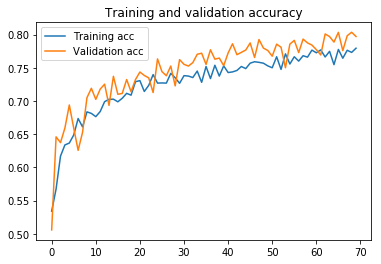

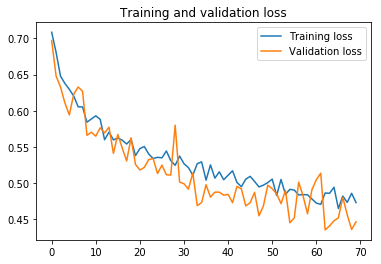

In [139]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [140]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.53812286567688
Test accuracy: 0.7085


In [0]:
predicted = model.predict_classes(X_test)
prob = model.predict_proba(X_test)

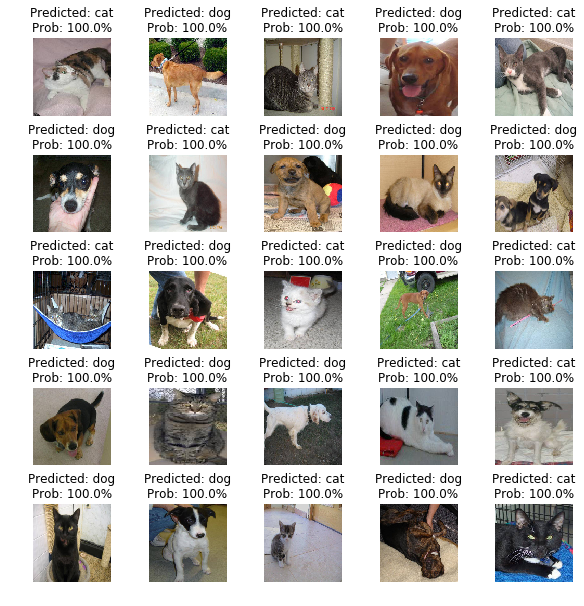

In [142]:
plt.figure(figsize=(10,10))
proba = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
    if(predicted[i] == 0):
        res = 'cat'
        proba = round(float(1-prob[i][0])*100.0,2)  # probability assigned to class 1 in sigmoid
    else:
        res = 'dog'
        proba = round((float(prob[i][0]))*100.0,2)
        
    title = "Predicted: "+res+"\nProb: "+str(proba)+"%"
    plt.title(title)
    plt.axis('off')
    plt.imshow(X_test[i]/255)

In [0]:
test = []
img = load_img('gdrive/My Drive/Colab Notebooks/cats_dogs/meaw.PNG', target_size=(150, 150))
test.append(img_to_array(img))

In [144]:
test = np.array(test)
test.shape

(1, 150, 150, 3)

In [0]:
p = model.predict(test)

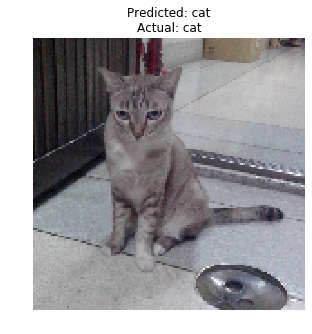

In [146]:
plt.figure(figsize=(5,5))
if(p[0] == 0):
    res = 'cat'
else:
    res = 'dog'

title = "Predicted: "+res+"\nActual: cat"
# title = "Predicted: "+res+"\nProb: "+str(prob[i][0])
plt.title(title)
plt.axis('off')
plt.imshow(test[0]/255)

In [0]:
model.save('gdrive/My Drive/Colab Notebooks/cats_dogs/acc70.h5')